In [12]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.
     Parameters
     ------------
     eta : float
     Learning rate (between 0.0 and 1.0)
     n_iter : int
     Passes over the training dataset.
     Attributes
     -----------
     w_ : 1d-array
     Веса после подгонки.
     errors_ : list
     Число неверных классификаций в каждую эпоху.
     """
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        """Выполнить подгонку модели под тренировочные данные. 
        Параметры
        ---------
        Х : {массивоподобный) , форма = [n_samples , features]
            тренировочные векторы , где
            n_samples - число образцов и
            features - число признаков.
        у: массивопообный , форма = [n_samples]
            Целевые значения.
    
        Возвращает
        ----------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Расчитать чистый вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Вернуть метку класса после едининичного скачка"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

Weights: [-0.4  -0.68  1.82]


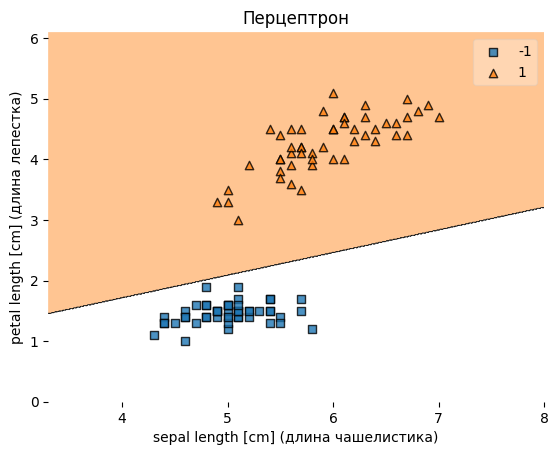

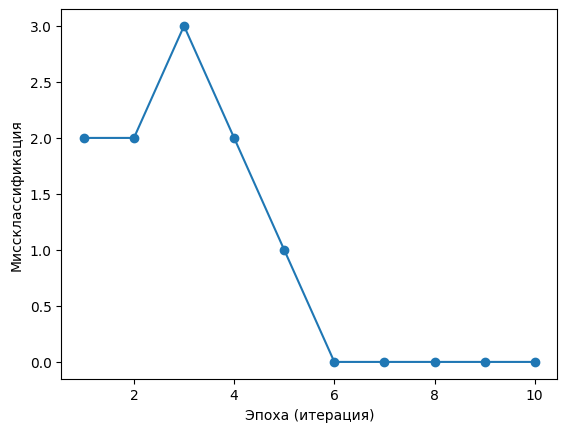

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Перцептрон')
plt.xlabel('sepal length [cm] (длина чашелистика)')
plt.ylabel('petal length [cm] (длина лепестка)')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Эпоха (итерация)')
plt.ylabel('Миссклассификация')
plt.show()

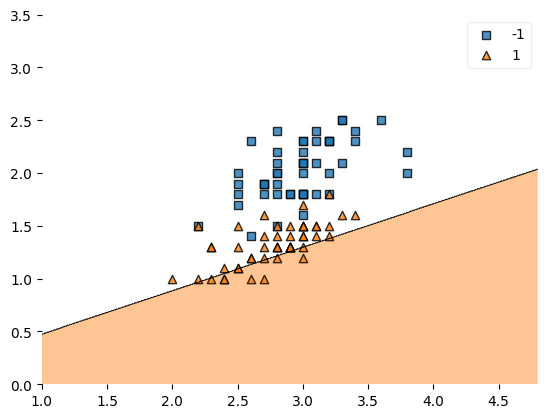

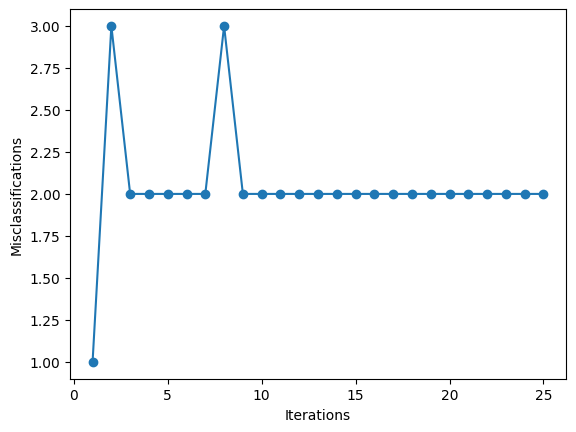

In [16]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

ppn = Perceptron(epochs=25, eta=0.01)
ppn.train(X2, y2)

plot_decision_regions(X2, y2, clf=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [17]:
print('Total number of misclassifications: %d of 100' % (y2 != ppn.predict(X2)).sum())

Total number of misclassifications: 43 of 100


ADALINE методом градиентного спуска

In [19]:
import numpy as np

class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

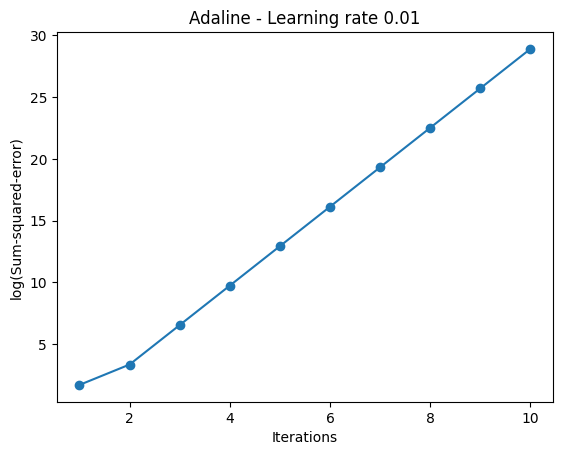

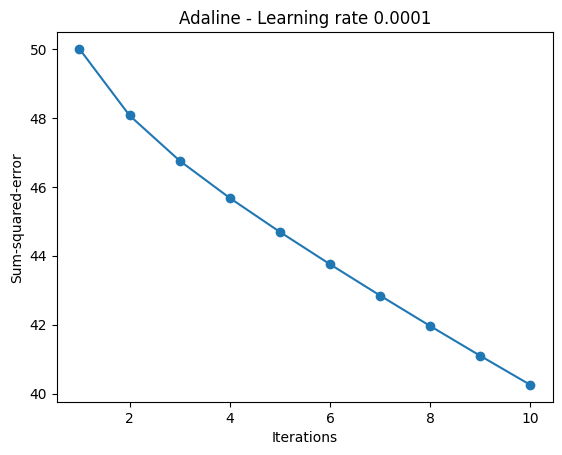

In [20]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()

Iteration: 30/30 | Cost 3.79 | Elapsed: 0:00:00 | ETA: 0:00:0000

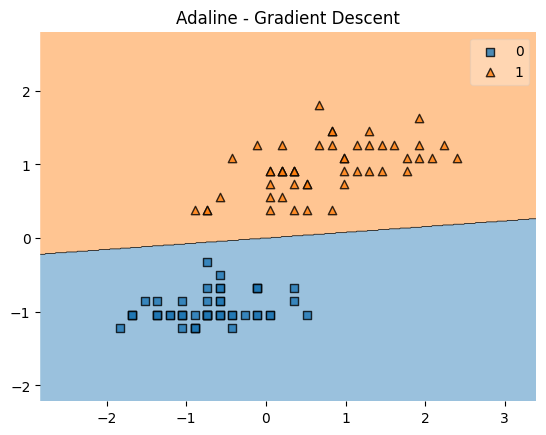

Text(0, 0.5, 'Cost')

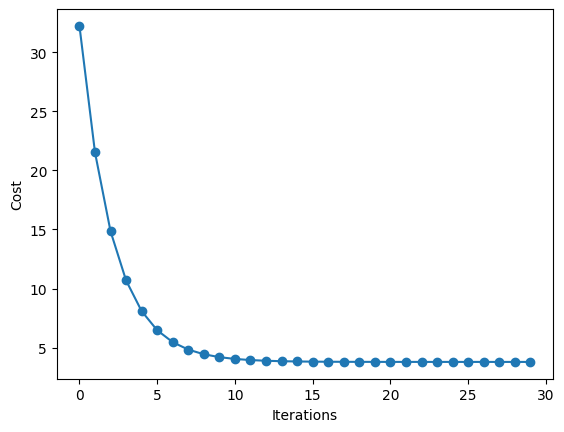

In [22]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Adaline
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = Adaline(epochs=30, 
              eta=0.01, 
              minibatches=1, # for Gradient Descent Learning
              random_seed=1,
              print_progress=3)

ada.fit(X, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.show()

plt.plot(range(len(ada.cost_)), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')